# Example MNIST classifier

This notebook is equivalent to `example_classifier` except that :
- It shows how to pass custom model configuration
- It uses a custom `learning-rate scheduler` 
- It uses the `Fashion MNIST` dataset
- It trains the model multiple times : it does not *restart* training but *continues* it and tracks configuration for all independant runs !

## Imports + model initialization

In [1]:
import pandas as pd
import tensorflow as tf

from utils import set_display_options, plot, plot_multiple, plot_confusion_matrix
from datasets import get_dataset, prepare_dataset, test_dataset_time
from models.classification.base_classifier import BaseClassifier
from custom_train_objects.optimizers import DivideByStep

set_display_options()

model_name = 'fashion_mnist_classifier'
print("Tensorflow version : {}".format(tf.__version__))

Tensorflow version : 2.5.0


In [7]:
input_shape = (28, 28, 1)

config = {
    'labels' : list(range(10)),
    'bnorm' : 'never',
    'drop_rate' : 0.5,
    'dense_units' : 28,
    'dense_activation' : None,
    'dense_drop_rate' : 0.
}
model = BaseClassifier(input_shape, nom = model_name, ** config)

print(model)

Initializing submodel : classifier !
Submodel classifier saved in pretrained_models\fashion_mnist_classifier\saving\classifier.json !
Model fashion_mnist_classifier initialized successfully !

========== fashion_mnist_classifier ==========
Sub model classifier
- Inputs 	: (None, 28, 28, 1)
- Outputs 	: (None, 10)
- Number of layers 	: 11
- Number of parameters 	: 0.025 Millions
- Model not compiled

Already trained on 0 epochs (0 steps)

Labels : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Multi-class : False



## Model instanciation + dataset loading

In [2]:
model = BaseClassifier(nom = model_name)

# equivalent to
# lr = DivideByStep(maxval = 1e-2, minval = 1e-3, factor = 1.)

lr = {'name' : 'DivideByStep', 'minval' : 1e-3, 'maxval' : 1e-2, 'factor' : 1.}

model.compile(optimizer_config = {'lr' : lr})

print(model)
model.summary()

Model restoration...
Initializing submodel : classifier !
Successfully restored classifier from pretrained_models/fashion_mnist_classifier/saving/classifier.json !
Model fashion_mnist_classifier initialized successfully !
Optimizer 'classifier_optimizer' initilized successfully !
Submodel classifier compiled !
  Loss : {'reduction': 'none', 'name': 'sparse_categorical_crossentropy', 'from_logits': False}
  Optimizer : {'name': 'Adam', 'learning_rate': {'class_name': 'DivideByStep', 'config': {'factor': <tf.Tensor: shape=(), dtype=float32, numpy=1.0>, 'minval': <tf.Tensor: shape=(), dtype=float32, numpy=0.001>, 'maxval': <tf.Tensor: shape=(), dtype=float32, numpy=0.01>}}, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
  Metrics : [{'name': 'sparse_categorical_accuracy', 'dtype': 'float32'}]

========== fashion_mnist_classifier ==========
Sub model classifier
- Inputs 	: (None, 28, 28, 1)
- Outputs 	: (None, 10)
- Number of layers 	: 11
- Number of para

In [3]:
dataset_name = 'fashion_mnist' if 'fashion' in model_name else 'mnist'
ds = get_dataset(dataset_name)

train, valid = ds['train'], ds['test']
print(train)
print(valid)

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


## Training + history analysis

In [16]:
model.train(
    train, validation_data = valid,
    epochs = 10, batch_size = 128,
    augment_prct = 0.25
)

Training config :
HParams :
- augment_prct	: 0.25
- batch_size	: 128
- train_batch_size	: None
- valid_batch_size	: None
- test_batch_size	: 1
- shuffle_size	: 1024
- epochs	: 20
- verbose	: 1
- train_times	: 1
- valid_times	: 1
- train_size	: None
- valid_size	: None
- test_size	: 4
- pred_step	: -1

Running on 1 GPU

Epoch 11 / 20
Epoch 11/20
469/469 [==============================] - 7s 14ms/step - loss: 0.3892 - sparse_categorical_accuracy: 0.8622 - val_loss: 0.3241 - val_sparse_categorical_accuracy: 0.8889

Saving at epoch 11 !

Making prediction at step 5159

Epoch 12 / 20
Epoch 12/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3833 - sparse_categorical_accuracy: 0.8621 - val_loss: 0.3267 - val_sparse_categorical_accuracy: 0.8886

Making prediction at step 5628

Epoch 13 / 20
Epoch 13/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3749 - sparse_categorical_accuracy: 0.8664 - val_loss: 0.3185 - val_sparse_categorical_accuracy: 0.8918

Sa

===== History =====
        loss  sparse_categorical_accuracy  val_loss  val_sparse_categorical_accuracy
0   0.611587                     0.775333  0.423426                           0.8566
1   0.476831                     0.828083  0.399800                           0.8621
2   0.443604                     0.839083  0.373078                           0.8742
3   0.430698                     0.843233  0.365736                           0.8731
4   0.419382                     0.849467  0.358427                           0.8821
5   0.409104                     0.852700  0.346774                           0.8828
6   0.401169                     0.855050  0.338613                           0.8873
7   0.396831                     0.858083  0.336853                           0.8878
8   0.391997                     0.859067  0.331128                           0.8881
9   0.387962                     0.860550  0.328133                           0.8888
10  0.383809                     0.862200  0.

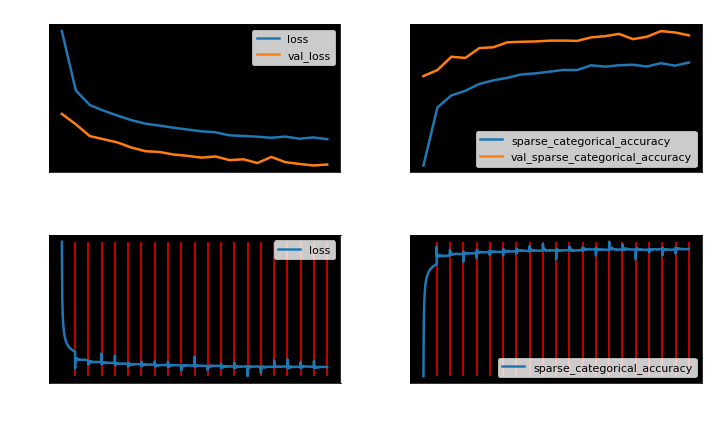

In [17]:
print(model.history)
model.plot_history()

In [18]:
print("Training config :")
print(pd.DataFrame(model.history.trainings_config))
print("\nTraining informations :")
print(pd.DataFrame(model.history.trainings_infos))


Training config :
   augment_prct  batch_size  epochs  pred_step  shuffle_size  test_batch_size  test_size train_batch_size train_size  \
0          0.25         128       5         -1          1024                1          4             None       None   
1          0.25         128      10         -1          1024                1          4             None       None   
2          0.25         128      20         -1          1024                1          4             None       None   

   train_times valid_batch_size valid_size  valid_times  verbose  
0            1             None       None            1        1  
1            1             None       None            1        1  
2            1             None       None            1        1  

Training informations :
                         end  final_epoch  interrupted                      start  start_epoch        time
0 2021-12-23 11:57:43.492760            4        False 2021-12-23 11:56:48.157662           -1   55.3

This cell shows a `gif animation` of `embeddings` representation accross epochs. 

To better understand what an `embedding` is, I suggest you to check [my other repo on Siamese Networks](https://github.com/yui-mhcp/siamese_networks)

In [ ]:
from utils.image import display_image

gifs = model.build_gif(show = False, n_repeat = 15)
display_image(gifs[0]) # only displays embeddings feature gif


## Prediction

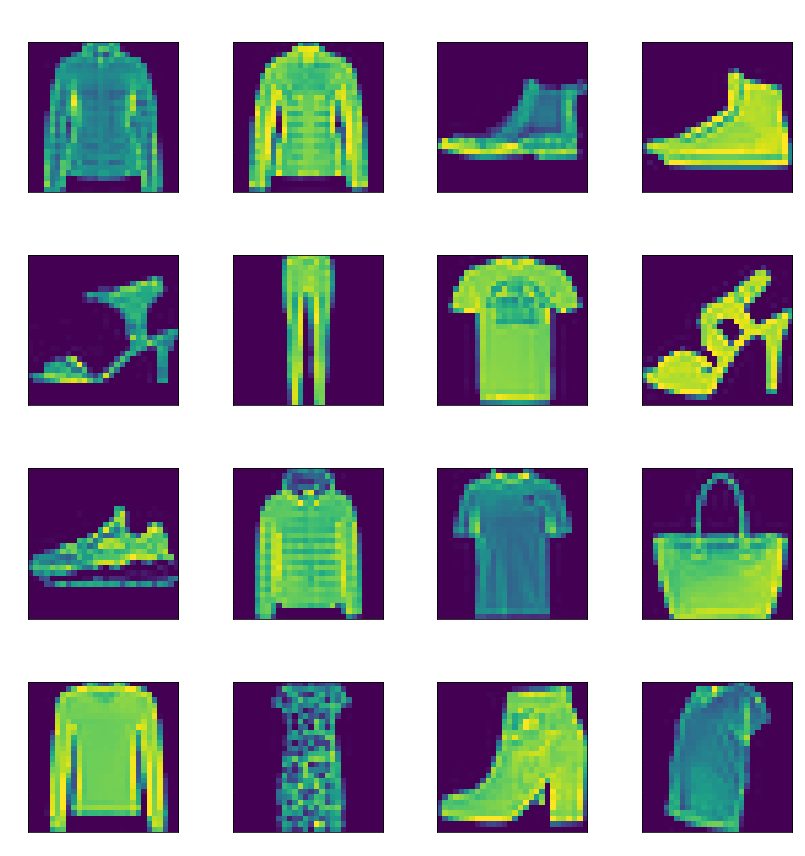

In [20]:
predictions = {}
for i, data in enumerate(valid):
    if i >= 16: break
    image, label = data['image'], data['label']
    
    pred, score = model.predict(image)[0]
    predictions['Pred {}\nClass : {} ({} ({:.2f}%))'.format(i, label, pred, score * 100)] = image

plot_multiple(** predictions, ncols = 4, plot_type = 'imshow')

## Confusion matrix

<Figure size 540x540 with 0 Axes>

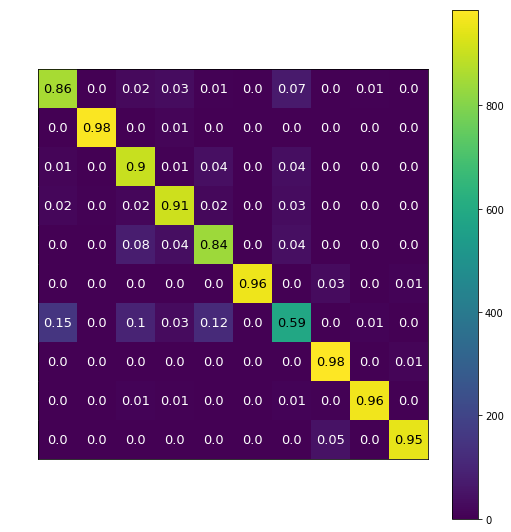

In [21]:
images, labels = [], []
for data in valid:
    images.append(data['image'])
    labels.append(data['label'])

pred = model.predict(images)
pred = [p[0] for p in pred] # p[1] is the confidence score

plot_confusion_matrix(true = labels, pred = pred)

## Test dataset performance

These 3 lines allow you to debug your processing pipeline and test its performances

In [22]:
config = model.get_dataset_config(is_validation = False, batch_size = 128)

ds_train = prepare_dataset(train, ** config, debug = True)
test_dataset_time(ds_train, steps = 1000)

100%|███████████████████████████████████████████████████████████████████████████████| 469/469 [00:01<00:00, 424.30it/s]


469 batchs in 1.109 sec sec (422.773 batch / sec)

Time estimated for all dataset (469 batch) : 55h 4min 40sec
Batch infos : 
Element 0 : shape : (96, 28, 28, 1) - type : <dtype: 'float32'> - min : 0.000 - max : 1.000
Element 1 : shape : (96,) - type : <dtype: 'int32'> - min : 0.000 - max : 9.000


1.1093418598175049

### Test learning-rate scheduler

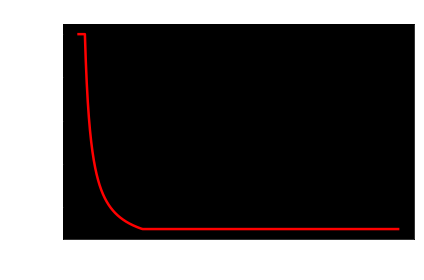

In [5]:
lr = DivideByStep(maxval = 1e-2, minval = 1e-3, factor = 1.)
lr.plot(5000)